In [2]:
from eykthyr.eykthyr.eykthyr import Eykthyr, load_anndata
import scanpy as sc
from eykthyr.eykthyr import pl
%load_ext autoreload
%autoreload 2

which: no R in (/work/magroup/skrieger/newconda/bin:/work/magroup/skrieger/newconda/condabin:/home/skrieger/.cargo/bin:/opt/openmpi/bin:/usr/lib64/qt-3.3/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/ganglia/bin:/opt/ganglia/sbin:/opt/pdsh/bin:/opt/rocks/bin:/opt/rocks/sbin:/home/skrieger/.local/bin:/home/skrieger/bin)


# slidetags

In [4]:
e = Eykthyr()

In [5]:
adrna = sc.read('processed_data/slidetags_multiome_rna_subset.h5ad')
adrna

AnnData object with n_obs × n_vars = 2535 × 36601
    obs: 'cell_type'
    var: 'gene_ids', 'feature_types'
    obsm: 'spatial'

In [6]:
e.set_RNA(adrna)

In [7]:
e.preprocess_rna(make_plots=True, cluster_annotation=['cell_type'])

In [9]:
e.compute_metagenes()

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
e.analyze_metagenes()

In [19]:
e.compute_TF_activity(peak_tsv='data/slidetags_multiome/slidetags_multiome_peaks.tsv',
                      archr_dataset_name='slidetags_multiome',
                      motif_tsv='data/slidetags_multiome/slidetags_multiome_motifs.tsv')

19


In [ ]:
e.num_metagenes = 16
e.compute_TF_metagene_weights()

In [23]:
e.perturbed_X = None
e.save_anndata('eykthyrtest.h5ad')

[2024/07/08 11:02:39]	 Writing results to eykthyrtest/popari.h5ad


In [26]:
e2 = load_anndata('eykthyrtest.h5ad')

[2024/07/08 11:04:34]	 Initializing MetageneState
[2024/07/08 11:04:34]	 Initializing SpatialAffinityState
[2024/07/08 11:04:34]	 Initializing EmbeddingOptimizer
[2024/07/08 11:04:34]	 Initializing EmbeddingState
[2024/07/08 11:04:34]	 Reloading level 0
[2024/07/08 11:04:34]	 Initializing MetageneState
[2024/07/08 11:04:34]	 Initializing SpatialAffinityState
[2024/07/08 11:04:34]	 Initializing EmbeddingOptimizer
[2024/07/08 11:04:34]	 Initializing EmbeddingState


In [ ]:
e.run_all_perturbations()

In [33]:
e.perturbed_X = sc.AnnData(X = e.popari.datasets[0].obsm['X'], obs=e.popari.datasets[0].obs, obsm=e.popari.datasets[0].obsm)

In [35]:
e.save_anndata('eykthyrtest.h5ad')

[2024/07/08 15:50:32]	 Writing results to eykthyrtest/popari.h5ad


# Plotting

In [4]:
e = load_anndata('eykthyrtest.h5ad')

/work/magroup/skrieger/newconda/envs/tangram3/lib/python3.8/site-packages/popari/util.py:500: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  i = torch.LongTensor(indices)


[2024/08/07 09:54:48]	 Initializing MetageneState
[2024/08/07 09:54:48]	 Initializing SpatialAffinityState
[2024/08/07 09:54:48]	 Initializing EmbeddingOptimizer
[2024/08/07 09:54:48]	 Initializing EmbeddingState
[2024/08/07 09:54:49]	 Reloading level 0
[2024/08/07 09:54:49]	 Initializing MetageneState
[2024/08/07 09:54:49]	 Initializing SpatialAffinityState
[2024/08/07 09:54:49]	 Initializing EmbeddingOptimizer
[2024/08/07 09:54:49]	 Initializing EmbeddingState


In [5]:
pl.prep_paga(e, 'original_leiden')

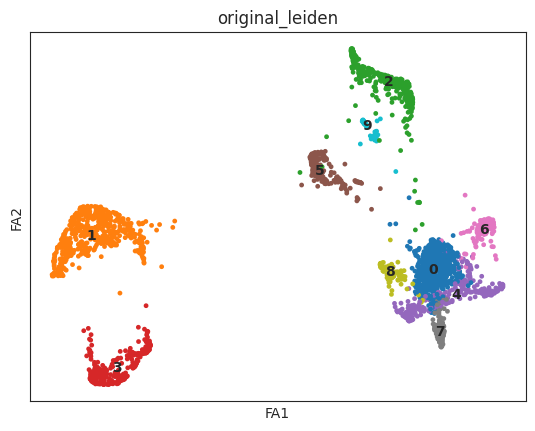

In [6]:
%matplotlib inline
sc.pl.draw_graph(e.perturbed_X, color='original_leiden', legend_loc='on data')

In [7]:
e.perturbed_X.obsm['spatial_scaled'] = (e.perturbed_X.obsm['spatial'] - e.perturbed_X.obsm['spatial'].
                                        min()) / e.perturbed_X.obsm['spatial'].max() * 100

In [8]:
e.perturbed_X.obsm['spatial'] = e.perturbed_X.obsm['spatial_scaled']

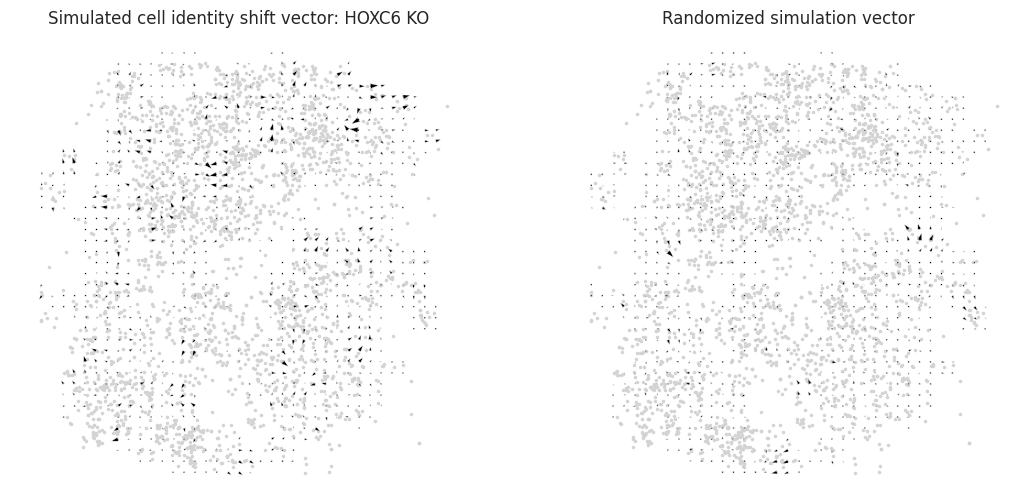

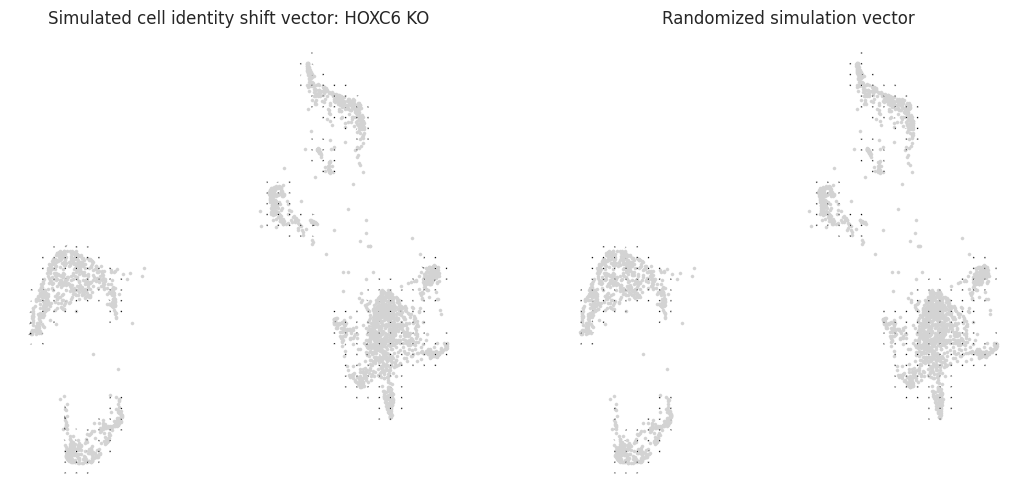

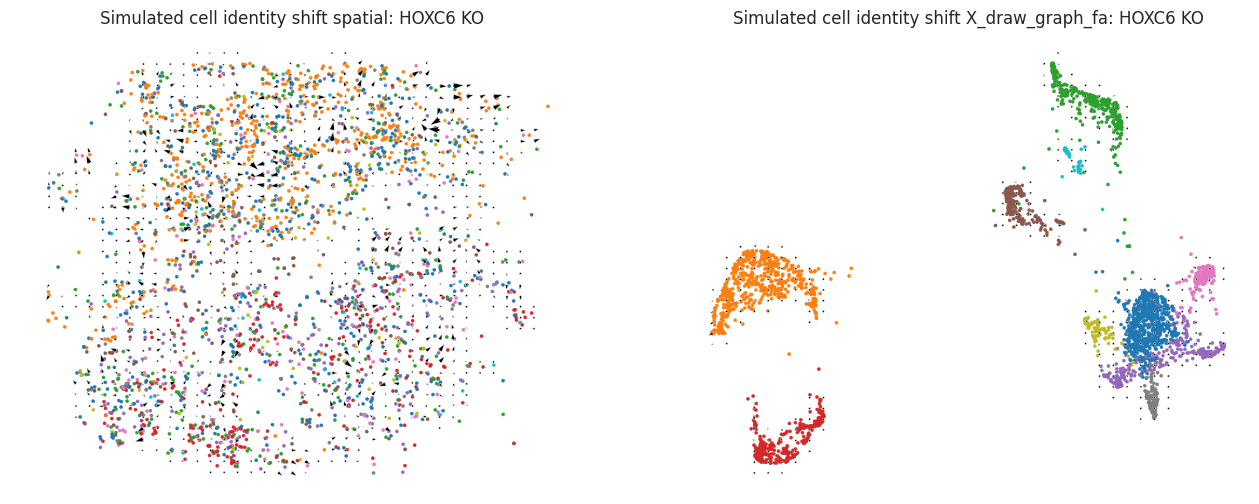

In [9]:
pl.paga_spatial_simulation(e, ['HOXC6'], 'original_leiden')

# spatial ATAC-RNA

In [21]:
e = Eykthyr()

In [22]:
adrna = sc.read('data/spatialatacrna/mouse_embryo2_rna.h5ad')
adrna

AnnData object with n_obs × n_vars = 2187 × 20900
    obsm: 'spatial'

In [23]:
e.set_RNA(adrna)

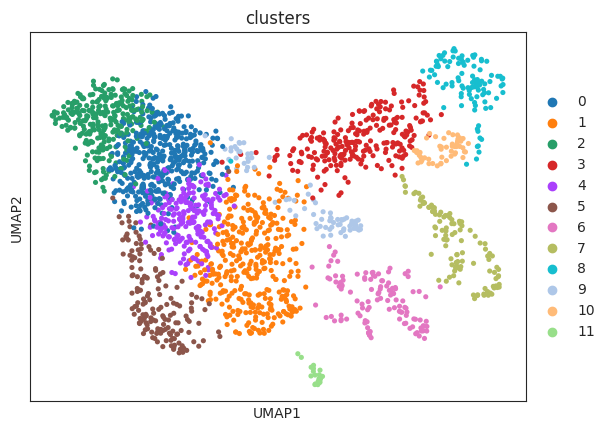

In [24]:
e.preprocess_rna(make_plots=True)

In [31]:
import torch
e.compute_metagenes(torch_context=dict(device='cpu', dtype=torch.float64))

INFO:root:[2024/07/09 12:48:48]	Updating model parameters
INFO:root:[2024/07/09 12:48:50]	Updating latent states
INFO:root:[2024/07/09 12:48:51]	Updating model parameters
INFO:root:[2024/07/09 12:49:27]	Updating latent states
INFO:root:[2024/07/09 12:49:29]	Updating model parameters
INFO:root:[2024/07/09 12:50:14]	Updating latent states
INFO:root:[2024/07/09 12:50:16]	Updating model parameters
INFO:root:[2024/07/09 12:50:43]	Updating latent states
INFO:root:[2024/07/09 12:50:44]	Updating model parameters
INFO:root:[2024/07/09 12:51:06]	Updating latent states
INFO:root:[2024/07/09 12:51:08]	Updating model parameters
INFO:root:[2024/07/09 12:51:24]	Updating latent states
INFO:root:[2024/07/09 12:51:26]	Updating model parameters
INFO:root:[2024/07/09 12:51:40]	Updating latent states
INFO:root:[2024/07/09 12:51:41]	Updating model parameters
INFO:root:[2024/07/09 12:51:51]	Updating latent states
INFO:root:[2024/07/09 12:51:53]	Updating model parameters
INFO:root:[2024/07/09 12:52:01]	Updati

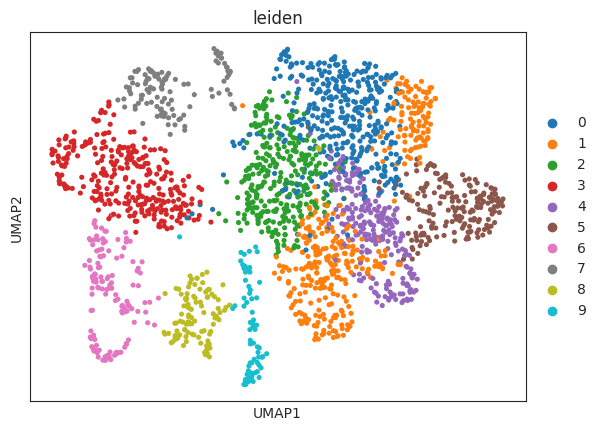

In [32]:
e.analyze_metagenes()

In [33]:
e.compute_TF_activity(peak_tsv='data/spatialatacrna/spatialATACRNAmouseembryo2_peaks.tsv',
                      archr_dataset_name='spatialATACRNAmouseembryo2',
                      motif_tsv='data/spatialatacrna/spatialATACRNAmouseembryo2_motifs.tsv')

In [36]:
e.compute_TF_metagene_weights()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
0
100
200
300
400
50

In [45]:
e.run_all_perturbations()

0
100
200
300
400
500
600
700
done perturbation
done leiden


In [50]:
e.save_anndata('eykthyrtest2.h5ad')

... storing 'leiden_Tcfap2a_dropout' as categorical
... storing 'leiden_Tcfap2b_dropout' as categorical
... storing 'leiden_Tcfap2c_dropout' as categorical
... storing 'leiden_Tcfap2e_dropout' as categorical
... storing 'leiden_Tcfap2d_dropout' as categorical
... storing 'leiden_Arid3b_dropout' as categorical
... storing 'leiden_Arid3a_dropout' as categorical
... storing 'leiden_Arid5b_dropout' as categorical
... storing 'leiden_Arid5a_dropout' as categorical
... storing 'leiden_Arid3c_dropout' as categorical
... storing 'leiden_Arid2_dropout' as categorical
... storing 'leiden_Setbp1_dropout' as categorical
... storing 'leiden_Ahctf1_dropout' as categorical
... storing 'leiden_Hmga2_dropout' as categorical
... storing 'leiden_Phf21a_dropout' as categorical
... storing 'leiden_Zfp957_dropout' as categorical
... storing 'leiden_Tcfe3_dropout' as categorical
... storing 'leiden_Mnt_dropout' as categorical
... storing 'leiden_Npas1_dropout' as categorical
... storing 'leiden_Tcfap4_dropou

In [2]:
from eykthyr.eykthyr import pl

In [3]:
e = load_anndata('eykthyrtest2.h5ad')

/work/magroup/skrieger/newconda/envs/tangram3/lib/python3.8/site-packages/popari/util.py:500: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  i = torch.LongTensor(indices)


[2024/07/11 09:51:59]	 Reloading level 0


In [4]:
pl.prep_paga(e, 'original_leiden')

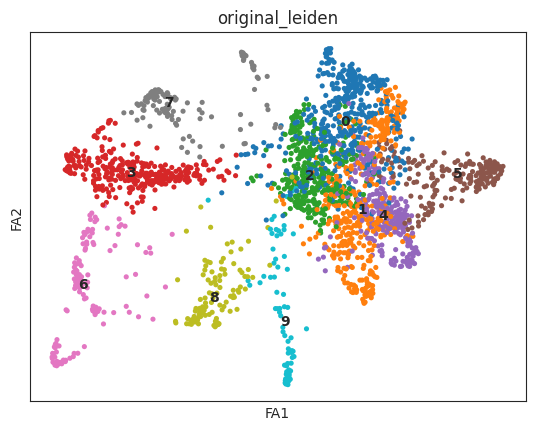

In [5]:
%matplotlib inline
sc.pl.draw_graph(e.perturbed_X, color='original_leiden', legend_loc='on data')

In [6]:
pl.paga_spatial_simulation(e, ['Msx1'], 'original_leiden')

16 genes were found in the adata. Note that Celloracle is intended to use around 1000-3000 genes, so the behavior with this number of genes may differ from what is expected.


UFuncTypeError: Cannot cast ufunc 'true_divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'